In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,log_loss,accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

 

# 1. About the Dataset

### 1.1 Loading the Dataset

**Dataset**: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [3]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head(5)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.shape

(8763, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                



### 1.1 Dataset Glossary:

There are 25 columns , and all the columns contains not-null values.

**Patient ID** - Unique identifier for each patient, which is stored as string.

__Age__ - Age of the patient, which is stored as integer.

**Sex** - Gender of the patient (Male/Female), which is stored as string.

**Cholesterol** - Cholesterol levels of the patient, which is stored as integer.

**Blood Pressure** - Blood pressure of the patient (systolic/diastolic), which is stored as string.

**Heart Rate** - Heart rate of the patient, which is stored as integer.

**Diabetes** - Whether the patient has diabetes (Yes/No), which is stored as integer.

**Family History** - Family history of heart-related problems (1: Yes, 0: No), which is stored as integer.

**Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker), which is stored as integer.

**Obesity** - Obesity status of the patient (1: Obese, 0: Not obese), which is stored as integer.

**Alcohol Consumption** - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy), which is stored as integer.

**Exercise Hours Per Week** - Number of exercise hours per week, which is stored as float.

**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy), which is stored as string.

**Previous Heart Problems** - Previous heart problems of the patient (1: Yes, 0: No), which is stored as integer.

**Medication Use** - Medication usage by the patient (1: Yes, 0: No), which is stored as integer.

**Stress Level** - Stress level reported by the patient (1-10), which is stored as integer.

**Sedentary Hours Per Day** - Hours of sedentary activity per day, which is stored as float.

**Income** - Income level of the patient, which is stored as integer.

**BMI** - Body Mass Index (BMI) of the patient, which is stored as float.

**Triglycerides** - Triglyceride levels of the patient, which is stored as integer.

**Physical Activity Days Per Week** - Days of physical activity per week, which is stored as integer.

**Sleep Hours Per Day** - Hours of sleep per day, which is stored as integer.

**Country** - Country of the patient, which is stored as string.

**Continent** - Continent where the patient resides, which is stored as string.

**Hemisphere** - Hemisphere where the patient resides, which is stored as string

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No), which is stored as integer. target output.

### 1.2 Descriptive Statistics of Numerical Features of the Dataset

In [6]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### 1.3 Feature Engineering

In [7]:
# Creating two new columns 'SystolicBP' and 'DiastolicBP'
df[['SystolicBP', 'DiastolicBP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df['MAP'] = (df['SystolicBP'] + 2 * df['DiastolicBP']) / 3  #Mean Arterial Pressure (MAP): MAP is the average pressure in a person's arteries during one heartbeat. also reflect the health of the arteries
df['PulsePressure'] = df['SystolicBP'] - df['DiastolicBP'] #numerical difference between systolic and diastolic blood pressure. It can give insights into the condition of the arteries.
df = df.drop(columns=['Blood Pressure'])
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,SystolicBP,DiastolicBP,MAP,PulsePressure
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,111.333333,70
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,117.000000,72
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,174,99,124.000000,75
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,121.000000,63
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,89.000000,3


### 1.4 Check How Data Distributed

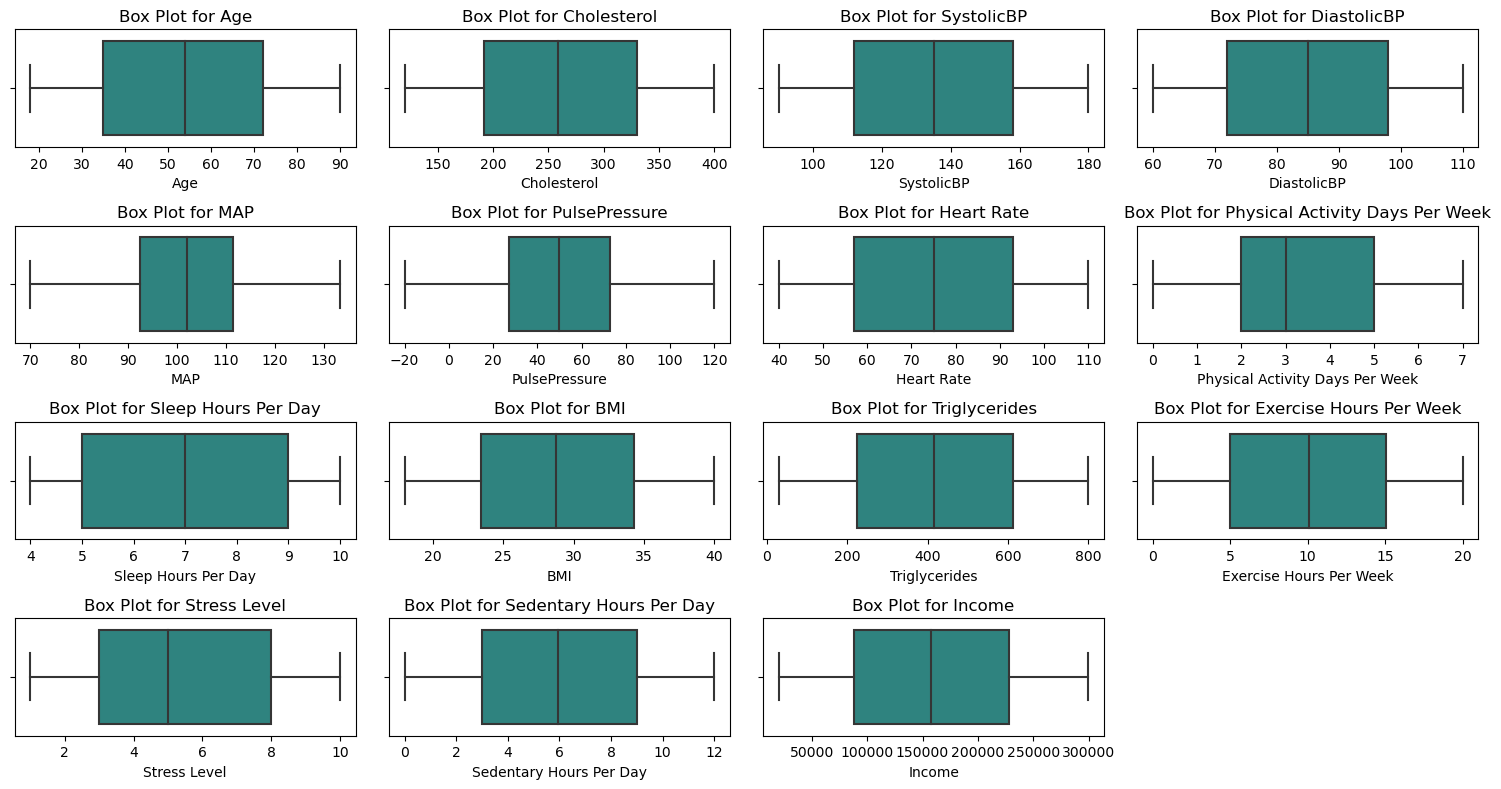

In [8]:
# to check existence of outliers in each column
numeric_columns = ['Age','Cholesterol','SystolicBP','DiastolicBP','MAP','PulsePressure','Heart Rate','Physical Activity Days Per Week','Sleep Hours Per Day','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','Income']

# Adjust the grid size based on the number of columns or select a subset to visualize
num_plots = len(numeric_columns)
num_rows = 4
num_cols = 4

plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    if i <= num_rows * num_cols:  # Ensure it stays within the specified grid size
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x=column, data=df, palette="viridis")
        plt.title(f"Box Plot for {column}")

plt.tight_layout()
plt.show()

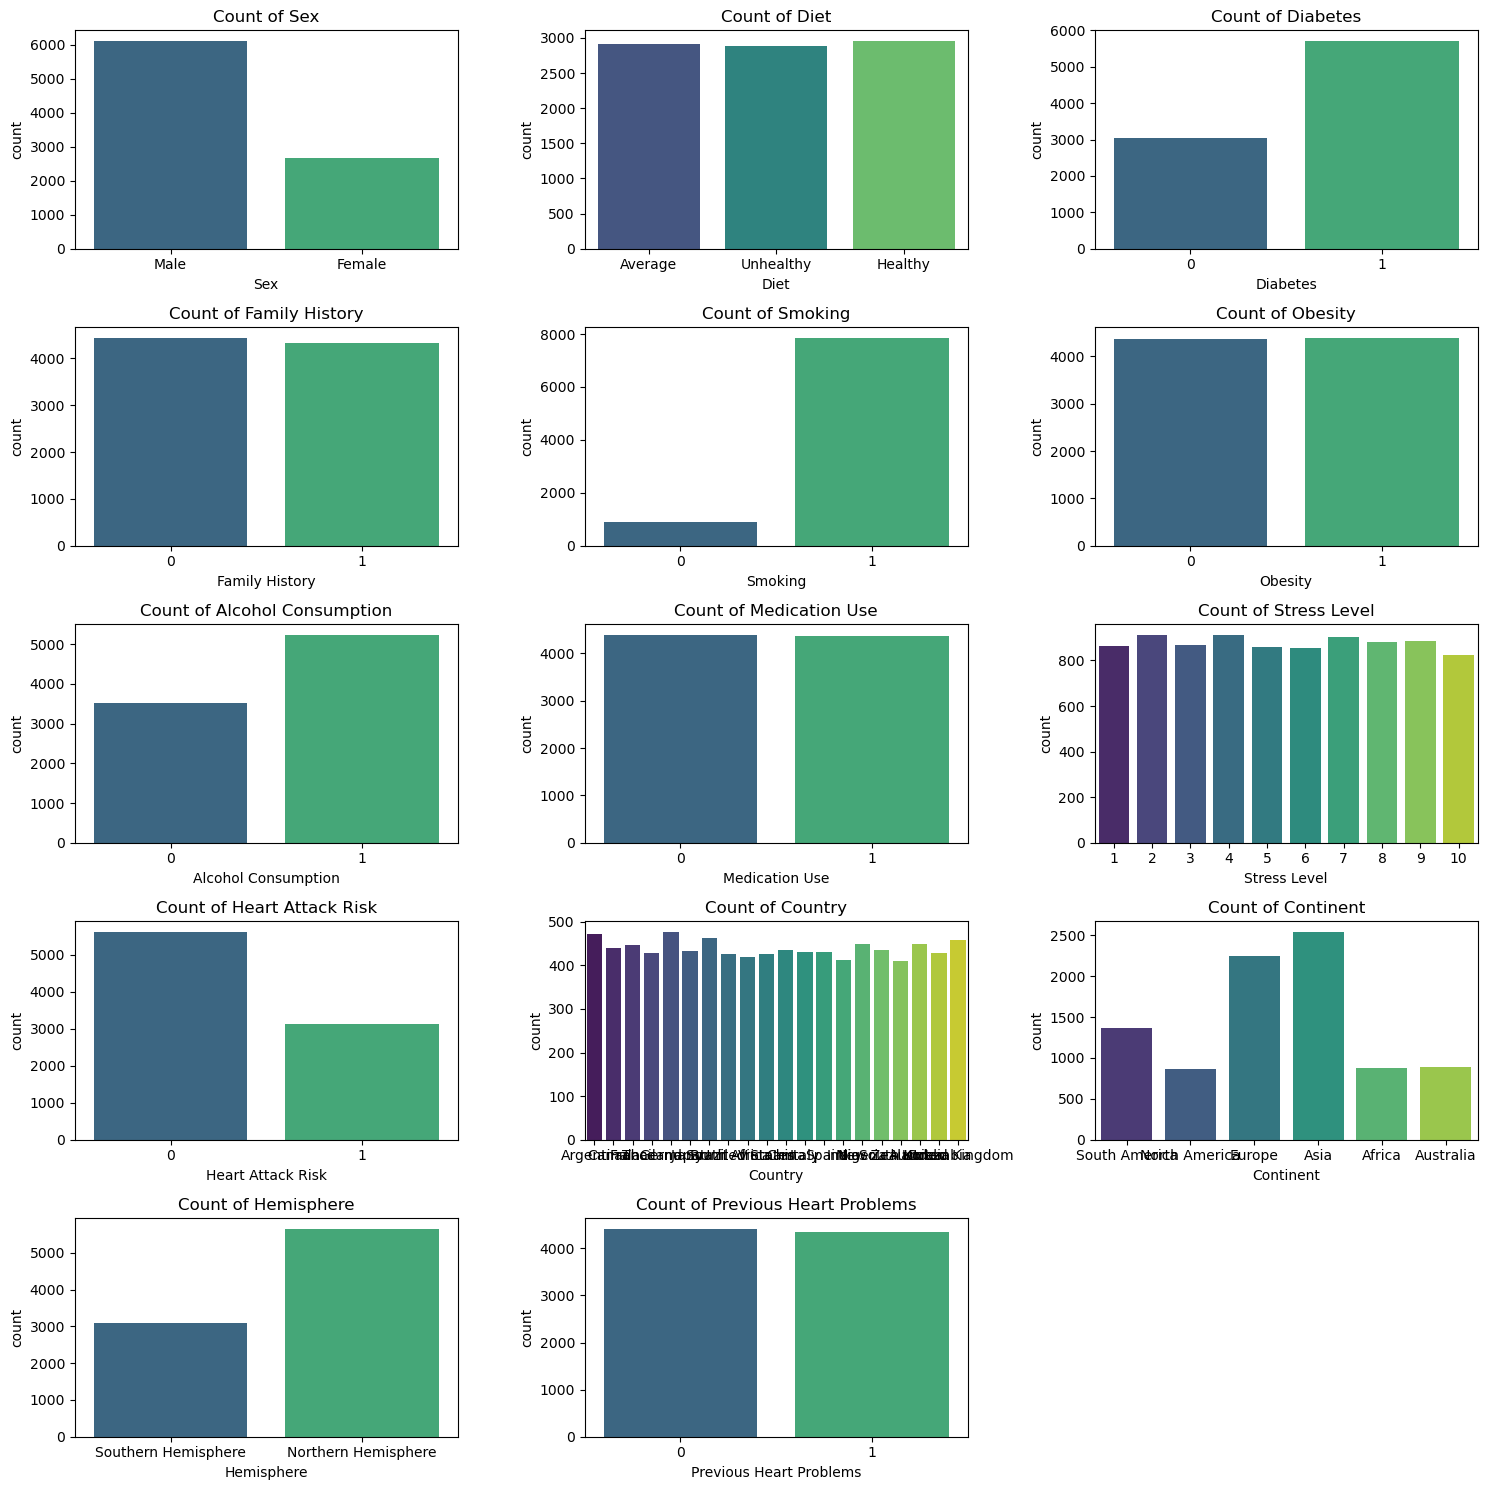

In [9]:
# To check existence of data imbalance
catogorical_columns = ["Sex","Diet","Diabetes","Family History","Smoking","Obesity","Alcohol Consumption","Medication Use","Stress Level","Heart Attack Risk","Country","Continent","Hemisphere","Previous Heart Problems"]

plt.figure(figsize=(15, 15))
for i, column in enumerate(catogorical_columns,1):
    plt.subplot(5,3 , i)
    sns.countplot(x=column, data=df, palette="viridis")
    plt.title(f"Count of {column}")
plt.tight_layout()
plt.show()

### 1.5 Over Sampling Techniques to Tackle Data Imbalance on target class

In [10]:
# Separate features and target variable
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Instantiate RandomOverSampler to handle imbalance by oversampling the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Heart Attack Risk')], axis=1)


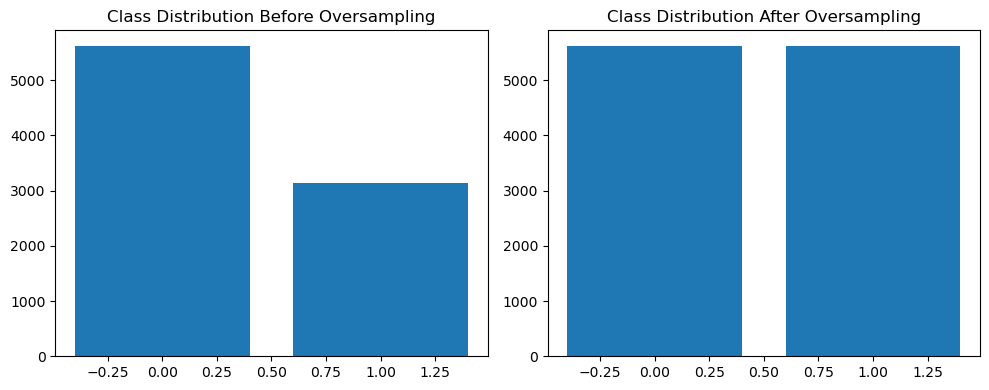

In [11]:
# Count class instances before oversampling
class_counts_before = df['Heart Attack Risk'].value_counts()

# Count class instances after oversampling
class_counts_after = resampled_data['Heart Attack Risk'].value_counts()  # Assuming 'resampled_data' is the oversampled dataset

# Plotting class distribution before and after oversampling
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(class_counts_before.index, class_counts_before.values)
plt.title('Class Distribution Before Oversampling')

plt.subplot(1, 2, 2)
plt.bar(class_counts_after.index, class_counts_after.values)
plt.title('Class Distribution After Oversampling')

plt.tight_layout()
plt.show()

### 1.6 Encoding Categorical Columns (One-hot encoding using Pandas)

In [12]:
catogorical_columns = ["Diet","Diabetes","Family History","Obesity","Alcohol Consumption","Medication Use","Stress Level","Country","Previous Heart Problems",'Smoking','Sex','Continent','Hemisphere']



In [13]:
catogorical_columns

['Diet',
 'Diabetes',
 'Family History',
 'Obesity',
 'Alcohol Consumption',
 'Medication Use',
 'Stress Level',
 'Country',
 'Previous Heart Problems',
 'Smoking',
 'Sex',
 'Continent',
 'Hemisphere']

In [14]:
# resampled_data = resampled_data.drop(columns=['Smoking','Continent','Hemisphere'])

In [15]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
encoded_data = pd.get_dummies(data = resampled_data,
                         prefix = catogorical_columns,
                         columns = catogorical_columns)
encoded_data.head()

,Patient ID,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,...,Sex_Female,Sex_Male,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,BMW7812,67,208,72,4.168189,6.615001,261404,31.251233,286,0,...,False,True,False,False,False,False,False,True,False,True
1,CZE1114,21,389,98,1.813242,4.963459,285768,27.194973,235,1,...,False,True,False,False,False,False,True,False,True,False
2,BNI9906,21,324,72,2.078353,9.463426,235282,28.176571,587,4,...,True,False,False,False,False,True,False,False,True,False
3,JLN3497,84,383,73,9.828130,7.648981,125640,36.464704,378,3,...,False,True,False,False,False,False,True,False,True,False
4,GFO8847,66,318,93,5.804299,1.514821,160555,21.809144,231,1,...,False,True,False,True,False,False,False,False,True,False


In [16]:
X =encoded_data.drop(columns=['Patient ID','Heart Attack Risk'])
y = encoded_data['Heart Attack Risk']

### 1.7 Splitting the Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [18]:
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 8998
test samples: 2250
target proportion: 0.4994


# 2. Model Building

## 2.1 Decision Tree

### 2.1.1 Base Model

In [19]:
dt_base_model = DecisionTreeClassifier(random_state = 42)
dt_base_model.fit(X_train, y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(dt_base_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(dt_base_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.7058


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

def auc_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)

# Use cross-validation to evaluate the model
auc_scores = cross_val_score(dt_base_model, X_train, y_train, cv=5, scoring=auc_scorer)

# Calculate the average AUC score
average_auc = auc_scores.mean()
print("Average AUC of Random Forest Base Model:", average_auc)

Average AUC of Random Forest Base Model: 0.6639137486759048


**Analysis**

The Decision Tree base model is showing overfitting problems, as the train accuracy is 1.0 and the test accuracy is around 0.7. The AUC score of 0.66 indicates that the model is not performing well in distinguishing between positive and negative classes. To optimize the model, I will perform hyperparameter tuning using GridSearchCV and analyze how it improves the model in terms of addressing the overfitting problem and increasing the AUC scores.

### 2.1.2 Model after Hyperparameter tuning using Grid Search Cross Validation

In [67]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 16, 20]
}

In [68]:
grid_search_dt = GridSearchCV(estimator=dt_base_model, param_grid=param_grid, cv=5)

In [69]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8, 16, 20],
                         'min_samples_split': [2, 5, 10]})

In [70]:
print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
print("Best estimator:", grid_search_dt.best_estimator_)

Best estimator: DecisionTreeClassifier(random_state=42)


In [72]:
# Evaluate the best model on the test set
best_model_dt = grid_search_dt.best_estimator_
accuracy_train_dt = best_model_dt.score(X_train, y_train)
accuracy_test_dt = best_model_dt.score(X_test, y_test)
print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 1.0
Accuracy on test set: 0.7057777777777777


In [96]:

def auc_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)

# Use cross-validation to evaluate the model
auc_scores_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring=auc_scorer)

# Calculate the average AUC score
average_auc_dt = auc_scores_dt.mean()
print("Average AUC of Decision Tree Best Model:", average_auc_dt)

Average AUC of Decision Tree Best Model: 0.6639137486759048


**Analysis**

The hyperparameter tuning using grid search cross-validation had almost zero effect on optimizing the model, as the test accuracy and AUC score remained the same as the base model. One possible reason for this is that decision trees are prone to overfitting, and even with hyperparameter tuning, it may be challenging to find a set of hyperparameters that significantly reduce overfitting while maintaining model performance. Next, I am going to train the model using the Random Forest algorithm to see if it performs better than the decision tree algorithm.

## 2.2 Random Forest

### 2.2.1 Base Model

In [74]:
rf_base_model = RandomForestClassifier(random_state = 42)
rf_base_model.fit(X_train, y_train)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(rf_base_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(rf_base_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.7871


In [75]:


# Define the evaluation metric as AUC
def auc_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)

# Use cross-validation to evaluate the model
auc_scores = cross_val_score(rf_base_model, X_train, y_train, cv=5, scoring=auc_scorer)

# Calculate the average AUC score
average_auc = auc_scores.mean()
print("Average AUC of Random Forest Base Model:", average_auc)

Average AUC of Random Forest Base Model: 0.7876047068029918


**Analysis**

The Random Forest base model performed better than the decision tree model, as it has a higher test accuracy and AUC score compared to the decision tree. This indicates that it has a relatively lower overfitting problem and is performing better at distinguishing between the positive and negative classes compared to the decision tree. However, the train accuracy is still 1.0 while the test accuracy is around 0.78, indicating that there is still room to optimize the model to tackle overfitting problems. Next, I will perform hyperparameter tuning using GridSearchCV and analyze how it improves the model in terms of addressing the overfitting problem and increasing the AUC scores.

### 2.2.2 Model after Hyperparameter tuning using Grid Search Cross Validation

In [76]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1,3, 5, 7],
    'max_features': ['sqrt', 'log2', 0.5]
}

In [77]:
grid_search_rf = GridSearchCV(estimator=rf_base_model, param_grid=param_grid, cv=5)

In [78]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [10, 50, 100]})

In [79]:
print("Best parameters:", grid_search_rf.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}


In [80]:
print("Best estimator:", grid_search_rf.best_estimator_)

Best estimator: RandomForestClassifier(max_features='log2', random_state=42)


In [81]:
# Evaluate the best model on the test set
best_model_rf = grid_search_rf.best_estimator_
accuracy_rf_train = best_model_rf.score(X_train, y_train)
accuracy_rf_test = best_model_rf.score(X_test, y_test)
print("Accuracy on train set:", accuracy_rf_train)
print("Accuracy on test set:", accuracy_rf_test)


Accuracy on train set: 1.0
Accuracy on test set: 0.7911111111111111


In [82]:
# Define the evaluation metric as AUC
def auc_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)

# Use cross-validation to evaluate the model
auc_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring=auc_scorer)

# Calculate the average AUC score
average_auc_rf = auc_scores.mean()
print("Average AUC:", average_auc)


Average AUC: 0.7876047068029918


**Analysis**

Just like the decision tree, hyperparameter tuning did not significantly improve the model performance, as the test accuracy only slightly increased from 0.78 to 0.79, and the AUC score remained the same as the base model. One possible reason for this is that the hyperparameter tuning I have chosen is not effective for this model.

## 2.3XG Boost

### 2.3.1 Base Model

In [87]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [88]:
xg_base_model = XGBClassifier(random_state = 42, verbosity = 0)
xg_base_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], verbose = False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xg_base_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xg_base_model.predict(X_test),y_test):.4f}")
accuracy_train_xg_base = accuracy_score(xg_base_model.predict(X_train),y_train)
accuracy_test_xg_base = accuracy_score(xg_base_model.predict(X_test),y_test)


Metrics train:
	Accuracy score: 0.9284
Metrics test:
	Accuracy score: 0.6982


In [94]:
# Define the AUC scorer function
def auc_scorer(model, X, y):
    y_pred = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_pred)

# Use cross-validation to evaluate the model
auc_scores_xg = cross_val_score(xg_base_model, X_train, y_train, cv=5, scoring=auc_scorer)

# Calculate the average AUC score
average_auc_xg = auc_scores_xg.mean()
print("Average AUC:", average_auc_xg)

Average AUC: 0.7477460376626425


**Analysis**

The XGBoost base model performed relatively well in predicting unseen data and distinguishing between the positive and negative classes compared to the decision tree model, as the difference between the train accuracy and test accuracy is not as significant as that of the decision tree model. However, it is not performing better than the random forest model. To optimize the XGBoost model, next I will perform hyperparameter tuning.

### 2.3.2 Model after Hyperparameter tuning using Grid Search Cross Validation

In [43]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [None, 2, 4],
    'n_estimators': [10, 50, 100],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 1],
    'reg_alpha': [0, 0.1, 1],
    'early_stopping_rounds': [5, 10, 20]
}

In [44]:
grid_search_xgb = GridSearchCV(estimator=xg_base_model, param_grid=param_grid, cv=3)

In [34]:
grid_search_xgb.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)],verbose = False)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'early_stopping_rounds': [5, 10, 20],
                         'gamma': [0, 0.1, 0.2], 'learning_rate': [0.1, 0.01],
                         'max_depth': [None, 2, 4],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 50, 100],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [0, 0.1, 1]})

In [35]:
# Print the best parameters
print("Best parameters:", grid_search_xgb.best_params_)

# Print the best estimator
print("Best estimator:", grid_search_xgb.best_estimator_)

Best parameters: {'early_stopping_rounds': 20, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [36]:
# Evaluate the best model on the test set
best_model_xgb = grid_search_xgb.best_estimator_
accuracy_XGB_train = best_model_xgb.score(X_train, y_train)
accuracy_XGB_test = best_model_xgb.score(X_test, y_test)
print("Accuracy on test set:", accuracy_XGB_train)
print("Accuracy on test set:", accuracy_XGB_test)

Accuracy on test set: 0.890864636585908
Accuracy on test set: 0.6484444444444445


In [43]:
auc_score_xgb = best_model_xgb.score(X_train_eval, y_train_eval)
print("AUC Score:", auc_score)

AUC Score: 0.6555555555555556


**Analysis**

Hyperparameter tuning worsened the model performance. One possible reason for this is that the hyperparameter grid used in tuning may not have included the optimal hyperparameters, leading to suboptimal choices. Expanding the hyperparameter grid to include a wider range of values can be used to find better parameters and improve the model. However, it is taking too long to run the program. Using a distributed computer system like Hadoop or Spark is one option to tackle this problem.

### Model Comparision

Selecting the best model from each of the three algorithms and comparing their performance in terms of tackling overfitting and distinguishing between the positive and negative classes.

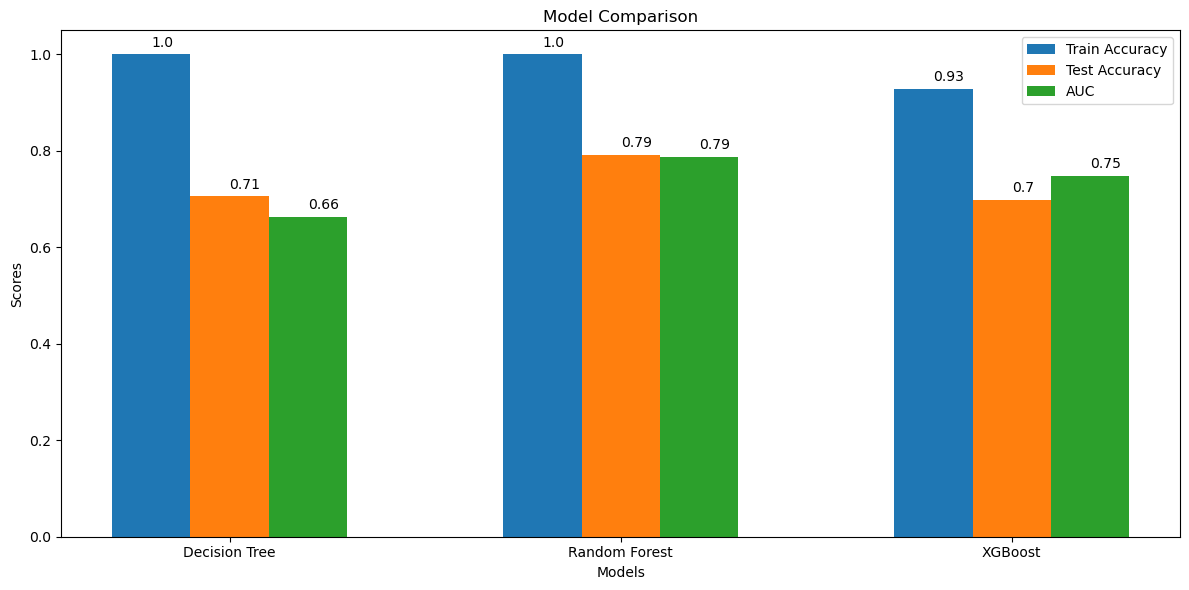

In [133]:
models = ['Decision Tree', 'Random Forest', 'XGBoost']
train_accuracy = [accuracy_train_dt, accuracy_rf_train, accuracy_train_xg_base]
test_accuracy = [accuracy_test_dt, accuracy_rf_test, accuracy_test_xg_base]
auc_scores = [average_auc_dt, average_auc_rf, average_auc_xg]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index - bar_width, train_accuracy, bar_width, label='Train Accuracy')
bar2 = ax.bar(index, test_accuracy, bar_width, label='Test Accuracy')
bar3 = ax.bar(index + bar_width, auc_scores, bar_width, label='AUC')

# Adding the numerical values on top of each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

**Analysis**

Random Forest model has a relatively higher test accuracy score of 0.79, indicating that the model is performing better on unseen data compared to other models. It also has a higher AUC score of 0.79, indicating that the model is better at distinguishing between positive and negative classes compared to other models. It can be concluded that the Random Forest, after hyperparameter tuning, performs best among all other models. However, there is still room to optimize the model to minimize overfitting problems.

**discussion**

Hyperparameter tunning method did not improve the model performance on all the 3 algorithms, decision tree, random forest, and XGBoost. the possible reason for that is hyperparameter grid used in tuning may not have included the optimal hyperparameters,expanding the hyperparameter grid to include a wider range of values can be used to find better parameters and improve the model. However, it is taking too long to run the program. Using a distributed computer system like Hadoop or Spark is one option to tackle this problem.

